In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/depression-professional-dataset/Depression Professional Dataset.csv


In [2]:
df=pd.read_csv('/kaggle/input/depression-professional-dataset/Depression Professional Dataset.csv')

In [3]:
df.head()

,Gender,Age,Work Pressure,Job Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work Hours,Financial Stress,Family History of Mental Illness,Depression
0,Female,37,2.0,4.0,7-8 hours,Moderate,No,6,2,No,No
1,Male,60,4.0,3.0,5-6 hours,Unhealthy,Yes,0,4,Yes,No
2,Female,42,2.0,3.0,5-6 hours,Moderate,No,0,2,No,No
3,Female,44,3.0,5.0,7-8 hours,Healthy,Yes,1,2,Yes,No
4,Male,48,4.0,3.0,7-8 hours,Moderate,Yes,6,5,Yes,No


In [4]:
df.nunique()

Gender                                    2
Age                                      43
Work Pressure                             5
Job Satisfaction                          5
Sleep Duration                            4
Dietary Habits                            3
Have you ever had suicidal thoughts ?     2
Work Hours                               13
Financial Stress                          5
Family History of Mental Illness          2
Depression                                2
dtype: int64

In [5]:
# check for null rows
df.isnull().sum()

Gender                                   0
Age                                      0
Work Pressure                            0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Have you ever had suicidal thoughts ?    0
Work Hours                               0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.dtypes

Gender                                    object
Age                                        int64
Work Pressure                            float64
Job Satisfaction                         float64
Sleep Duration                            object
Dietary Habits                            object
Have you ever had suicidal thoughts ?     object
Work Hours                                 int64
Financial Stress                           int64
Family History of Mental Illness          object
Depression                                object
dtype: object

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df.columns

Index(['Gender', 'Age', 'Work Pressure', 'Job Satisfaction', 'Sleep Duration',
       'Dietary Habits', 'Have you ever had suicidal thoughts ?', 'Work Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')

We look at the distributions of the categorical variables and we find that they are quite balanced across the categories.

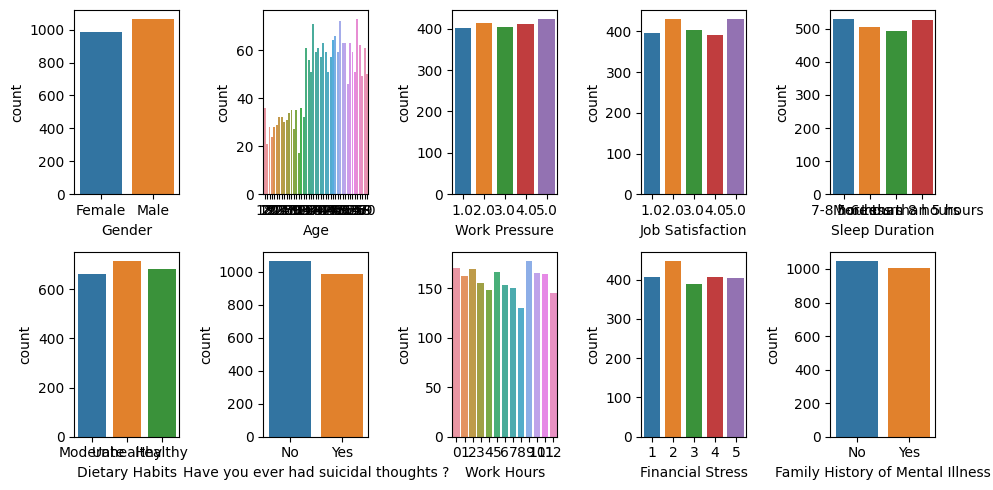

In [10]:
fig,ax=plt.subplots(2,5,figsize=(10,5))

j=0
for i,t in enumerate(df.columns[:-1]):
    
    ax[i//5][i%5]=sns.countplot(x=df[t],ax=ax[i//5][i%5])
    j+=1

fig.tight_layout()
plt.show()


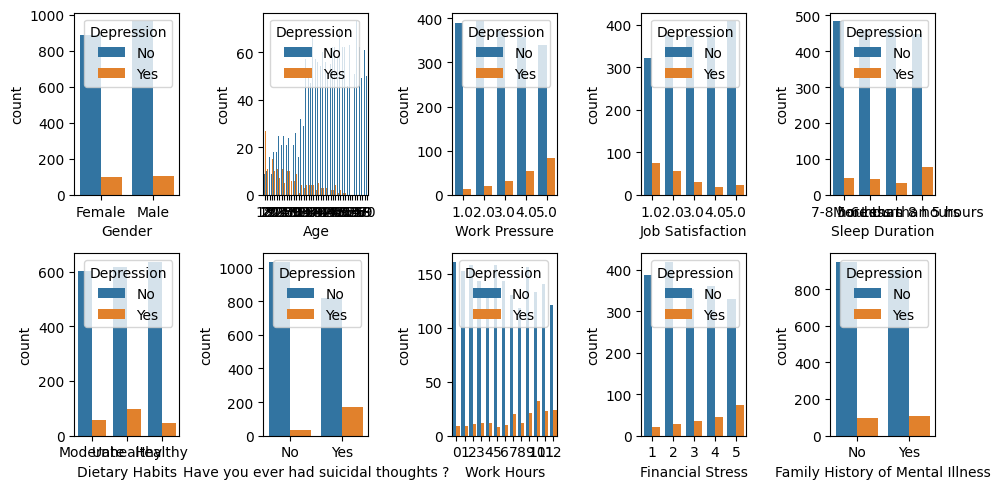

In [11]:
fig,ax=plt.subplots(2,5,figsize=(10,5))

j=0
for i,t in enumerate(df.columns[:-1]):
    
    ax[i//5][i%5]=sns.countplot(x=df[t],hue=df['Depression'],ax=ax[i//5][i%5])
    j+=1

fig.tight_layout()
plt.show()

## Logistic Regression

In [12]:
from sklearn.linear_model import LogisticRegressionCV

In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [14]:
for column in df:
    if df[column].dtype == 'object':
        df[column] = le.fit_transform(df[column])

In [15]:
df

,Gender,Age,Work Pressure,Job Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,37,2.0,4.0,1,1,0,6,2,0,0
1,1,60,4.0,3.0,0,2,1,0,4,1,0
2,0,42,2.0,3.0,0,1,0,0,2,0,0
3,0,44,3.0,5.0,1,0,1,1,2,1,0
4,1,48,4.0,3.0,1,1,1,6,5,1,0
...,...,...,...,...,...,...,...,...,...,...,...
2049,0,45,1.0,3.0,2,0,1,2,5,1,0
2050,1,25,1.0,5.0,0,0,1,12,3,1,0
2051,0,23,3.0,1.0,2,1,1,8,3,0,1
2052,0,24,1.0,4.0,2,1,1,4,4,0,0


In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X=df.drop(['Depression'],axis=1)
y=df['Depression']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)

lbfgs didnt work

In [19]:
clf = LogisticRegressionCV(cv=5, random_state=0,solver='liblinear')
clf.fit(X_train,y_train)

LogisticRegressionCV(cv=5, random_state=0, solver='liblinear')

In [20]:
preds=clf.predict(X_test)

In [21]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
cm = confusion_matrix(y_test, preds)
print(cm)
accuracy_score(y_test, preds)
f1_score(y_test,preds)

[[456   5]
 [  7  46]]


0.8846153846153846

We are going to try again with different scoring.

In [22]:
clf = LogisticRegressionCV(cv=5, random_state=0,solver='liblinear',scoring='f1')
clf.fit(X_train,y_train)

LogisticRegressionCV(cv=5, random_state=0, scoring='f1', solver='liblinear')

In [23]:
preds=clf.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
cm = confusion_matrix(y_test, preds)
print(cm)
accuracy_score(y_test, preds)
f1_score(y_test,preds)

[[456   5]
 [  7  46]]


0.8846153846153846

# Class balance

In [24]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y)

In [25]:
clf = LogisticRegressionCV(cv=5, random_state=0,solver='liblinear',scoring='f1')
clf.fit(X_train,y_train)

LogisticRegressionCV(cv=5, random_state=0, scoring='f1', solver='liblinear')

In [26]:
preds=clf.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
cm = confusion_matrix(y_test, preds)
print(cm)
accuracy_score(y_test, preds)
f1_score(y_test,preds)

[[455   8]
 [  3  48]]


0.897196261682243

In [27]:
clf = LogisticRegressionCV(cv=5, random_state=0,solver='liblinear',scoring='f1',penalty='l1',Cs=[0.01,0.1,1,5,10,20])
clf.fit(X_train,y_train)
preds=clf.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
cm = confusion_matrix(y_test, preds)
print(cm)
print('accuracy:',accuracy_score(y_test, preds),'f1:',f1_score(y_test,preds))

[[455   8]
 [  3  48]]
accuracy: 0.9785992217898832 f1: 0.897196261682243


In [29]:
len(df.index[df['Depression']==1].tolist())

203

In [30]:
idis=df.index[df['Depression']==1].tolist()

In [31]:
df1=df

In [33]:
filtered_df = df[df['Depression'] == 1]

# Step 2: Sample 2 rows from the filtered DataFrame
sampled_rows = filtered_df.sample(n=400, random_state=42,replace=True)

exclude_column = 'Depression'

# Step 1: Select columns to modify (all but 'A')
columns_to_modify = sampled_rows.columns.difference([exclude_column])

# Step 2: Add Gaussian noise to the selected columns
noise = np.random.normal(0, 1, sampled_rows[columns_to_modify].shape)  # Noise with mean=0, std=1
df_with_noise = sampled_rows.copy()
df_with_noise[columns_to_modify] += noise
# Step 3 (Optional): Append sampled rows back to the original DataFrame
df_augmented = pd.concat([df, df_with_noise], ignore_index=True)

In [34]:
df_augmented

,Gender,Age,Work Pressure,Job Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work Hours,Financial Stress,Family History of Mental Illness,Depression
0,0.000000,37.000000,2.000000,4.000000,1.000000,1.000000,0.000000,6.000000,2.000000,0.000000,0
1,1.000000,60.000000,4.000000,3.000000,0.000000,2.000000,1.000000,0.000000,4.000000,1.000000,0
2,0.000000,42.000000,2.000000,3.000000,0.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0
3,0.000000,44.000000,3.000000,5.000000,1.000000,0.000000,1.000000,1.000000,2.000000,1.000000,0
4,1.000000,48.000000,4.000000,3.000000,1.000000,1.000000,1.000000,6.000000,5.000000,1.000000,0
...,...,...,...,...,...,...,...,...,...,...,...
2449,0.517648,18.809984,2.230632,5.967753,-0.855696,2.110940,2.237595,4.719980,4.862513,1.420342,1
2450,0.753024,17.860408,3.763651,1.708746,0.571706,2.138344,1.300967,1.906328,4.001989,0.396441,1
2451,0.023897,54.003624,4.256754,2.212095,1.996066,2.046099,0.019249,10.814520,5.663150,0.561171,1
2452,1.137486,17.980743,4.290567,5.254902,1.712953,1.849186,0.624191,1.819214,4.297520,1.380954,1


In [35]:
X=df_augmented.drop(['Depression'],axis=1)
y=df_augmented['Depression']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y)

In [37]:
clf = LogisticRegressionCV(cv=5, random_state=0,solver='liblinear',scoring='f1',penalty='l1',Cs=[0.01,0.1,1,5,10,20])
clf.fit(X_train,y_train)
preds=clf.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
cm = confusion_matrix(y_test, preds)
print(cm)
print('accuracy:',accuracy_score(y_test, preds),'f1:',f1_score(y_test,preds))

[[441  22]
 [ 24 127]]
accuracy: 0.9250814332247557 f1: 0.8466666666666667
